## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, make_scorer
import warnings

warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
file_path = 'credit_card_fraud_detection_dataset.csv'
df = pd.read_csv(file_path)

## Display the Information of Dataset

In [3]:
df.head()

,Transaction_Amount,Transaction_Time,Customer_Age,Customer_Region,Merchant_Category,Card_Type,Transaction_Mode,Previous_Fraud_Flag,Fraud
0,1873.3,467.8,39,West,Travel,Debit,Online,0,0
1,4753.6,404.8,19,South,Travel,Prepaid,ATM,0,0
2,3660.2,193.8,21,South,Health,Debit,POS,0,0
3,2993.7,934.6,62,South,Retail,Debit,POS,1,0
4,780.9,647.5,30,South,Food,Credit,Online,0,0


In [4]:
df.tail()

,Transaction_Amount,Transaction_Time,Customer_Age,Customer_Region,Merchant_Category,Card_Type,Transaction_Mode,Previous_Fraud_Flag,Fraud
9995,4288.4,2095.9,36,South,Electronics,Prepaid,ATM,0,0
9996,4487.6,47.9,21,West,Health,Debit,Online,1,0
9997,4733.6,362.0,43,East,Health,Credit,Online,0,0
9998,1988.0,585.8,41,South,Food,Credit,Online,1,0
9999,1086.5,189.1,56,South,Health,Credit,ATM,0,0


In [5]:
df.sample(10)

,Transaction_Amount,Transaction_Time,Customer_Age,Customer_Region,Merchant_Category,Card_Type,Transaction_Mode,Previous_Fraud_Flag,Fraud
7776,1705.9,1796.0,30,East,Travel,Credit,Online,0,0
6217,1833.4,1261.1,64,West,Health,Credit,POS,0,0
6344,2089.1,423.2,35,West,Health,Prepaid,Online,0,0
7052,4649.4,227.9,62,South,Travel,Prepaid,ATM,0,0
6520,1129.1,195.7,57,East,Food,Credit,Online,0,0
3375,3890.3,837.4,58,South,Travel,Credit,Online,0,0
8195,1584.1,822.4,31,East,Electronics,Prepaid,Online,0,0
4262,2074.7,641.4,47,North,Retail,Debit,POS,0,0
1189,3541.2,1021.9,31,East,Health,Credit,ATM,1,0
8200,957.3,2213.1,62,East,Retail,Prepaid,Online,0,0


## Cheacking Null values

In [6]:
df.isnull().sum()

Transaction_Amount     0
Transaction_Time       0
Customer_Age           0
Customer_Region        0
Merchant_Category      0
Card_Type              0
Transaction_Mode       0
Previous_Fraud_Flag    0
Fraud                  0
dtype: int64

In [7]:
df.dropna()

,Transaction_Amount,Transaction_Time,Customer_Age,Customer_Region,Merchant_Category,Card_Type,Transaction_Mode,Previous_Fraud_Flag,Fraud
0,1873.3,467.8,39,West,Travel,Debit,Online,0,0
1,4753.6,404.8,19,South,Travel,Prepaid,ATM,0,0
2,3660.2,193.8,21,South,Health,Debit,POS,0,0
3,2993.7,934.6,62,South,Retail,Debit,POS,1,0
4,780.9,647.5,30,South,Food,Credit,Online,0,0
...,...,...,...,...,...,...,...,...,...
9995,4288.4,2095.9,36,South,Electronics,Prepaid,ATM,0,0
9996,4487.6,47.9,21,West,Health,Debit,Online,1,0
9997,4733.6,362.0,43,East,Health,Credit,Online,0,0
9998,1988.0,585.8,41,South,Food,Credit,Online,1,0


## Data preprocessing

In [8]:
# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

## Split the data into features and target

In [9]:
X = df.drop('Fraud', axis=1)
y = df['Fraud']

## Address class imbalance using SMOTE

In [10]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## Split the resampled data into training and test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

## Standardize the feature data

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring=f1_scorer, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(f1_score, response_method='predict'))

## Best model from GridSearch

In [14]:
best_model = grid_search.best_estimator_    

## Threshold adjustment using CalibratedClassifierCV

In [15]:
calibrated_model = CalibratedClassifierCV(best_model, cv='prefit')
calibrated_model.fit(X_train_scaled, y_train)

CalibratedClassifierCV(cv='prefit',
                       estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_leaf=2,
                                                        random_state=42))

## Predict probabilities

In [16]:
y_probs = calibrated_model.predict_proba(X_test_scaled)[:, 1]

## Adjust the decision threshold to maximize F1 score

In [17]:
threshold = 0.4  
y_pred = (y_probs >= threshold).astype(int)

## Evaluate the model using F1 score

In [18]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

F1 Score: 0.7861
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      2861
           1       0.71      0.87      0.79      2808

    accuracy                           0.76      5669
   macro avg       0.78      0.77      0.76      5669
weighted avg       0.78      0.76      0.76      5669



## Display the best hyperparameters found by GridSearch

In [19]:
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


## Define and train the models

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

## Evaluate the models

In [21]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

## Print the evaluation results

In [22]:
print("Model Evaluation Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.8f}")

Model Evaluation Results:

Logistic Regression:
Accuracy: 0.65143764
Precision: 0.63866667
Recall: 0.68233618
F1-Score: 0.65977961

Decision Tree:
Accuracy: 0.83065796
Precision: 0.80535360
Recall: 0.86787749
F1-Score: 0.83544738

Random Forest:
Accuracy: 0.88004939
Precision: 0.84680574
Recall: 0.92521368
F1-Score: 0.88427502

XGBoost:
Accuracy: 0.87511025
Precision: 0.84291313
Recall: 0.91915954
F1-Score: 0.87938671


## Standardize the feature data

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train the Decision Tree Classifier

In [24]:
model = RandomForestClassifier()
model.fit(X_scaled, y)

RandomForestClassifier()

## Visualization

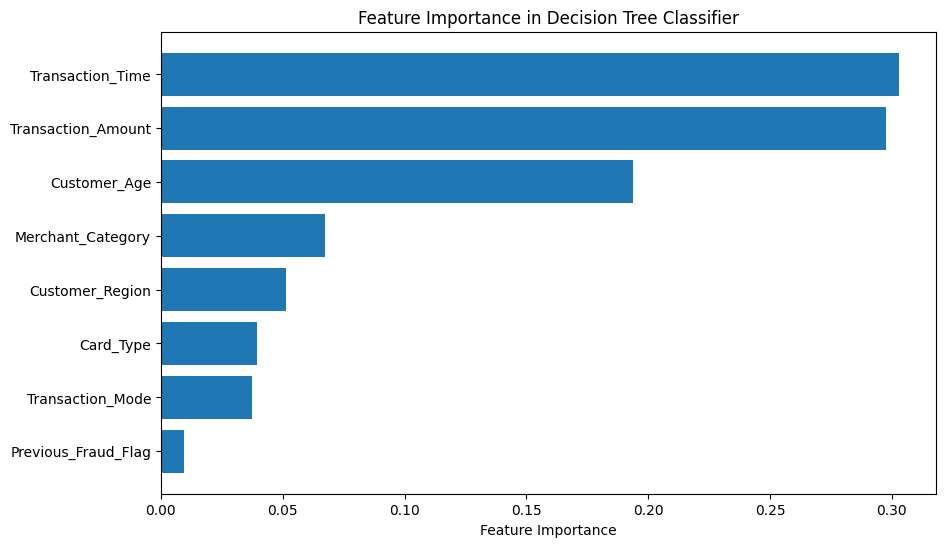

In [25]:
# Feature Importance Visualization
def plot_feature_importance():
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance in Decision Tree Classifier')
    plt.show()

plot_feature_importance()

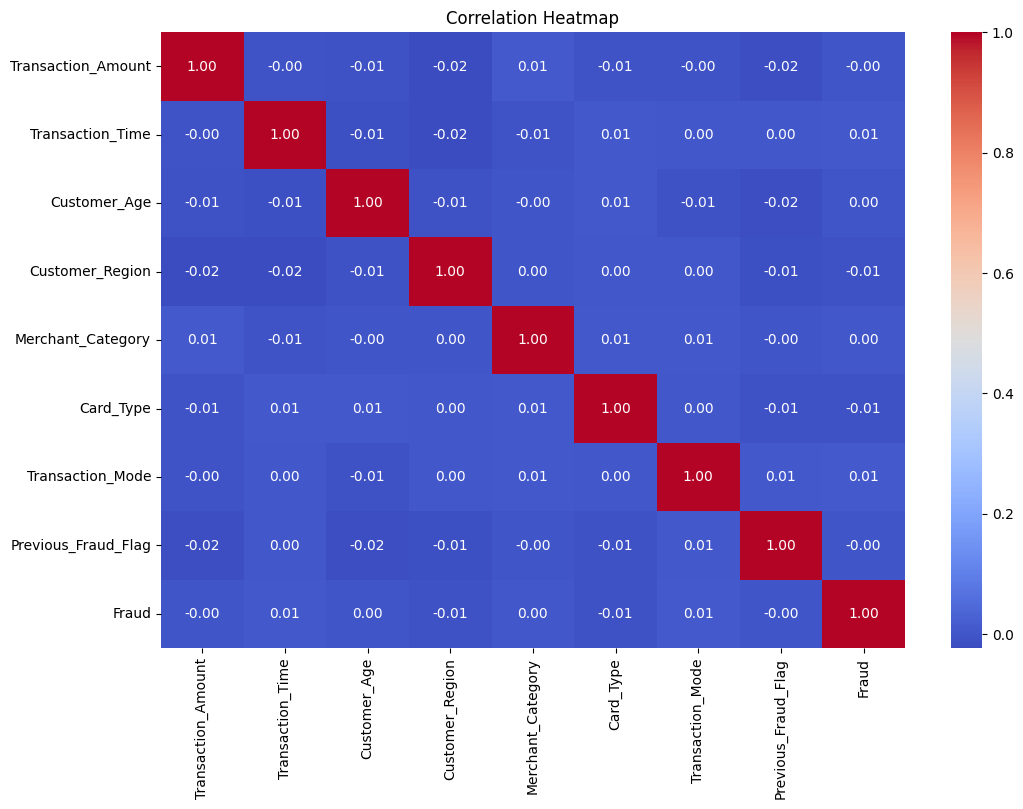

In [26]:
# Correlation Heatmap Visualization
def plot_correlation_heatmap():
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap()

## Distribution Plots for Key Features

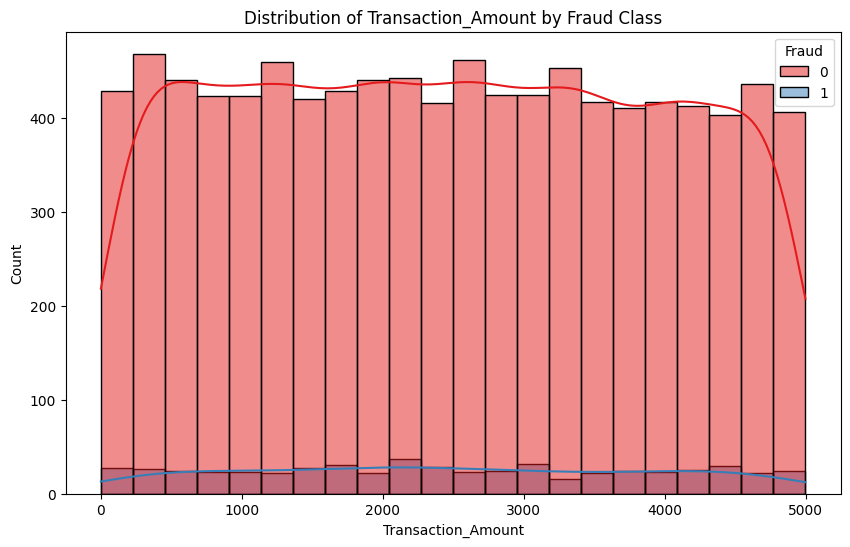

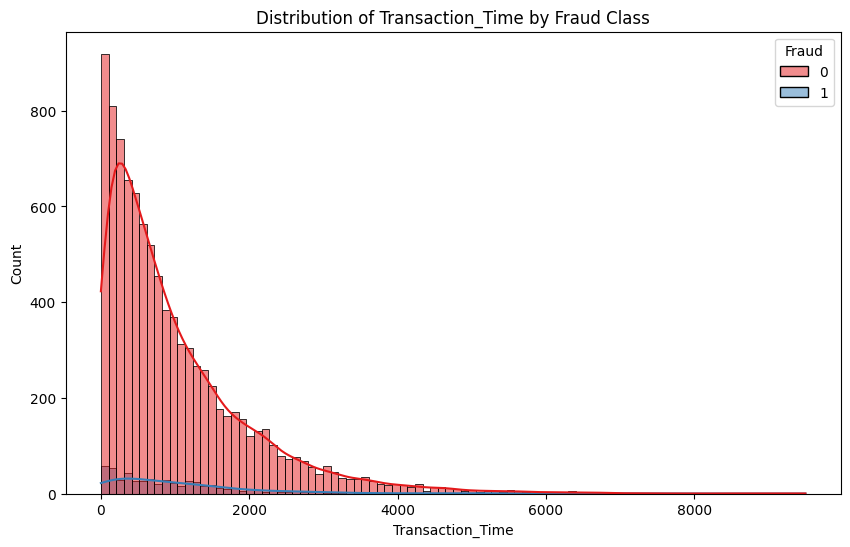

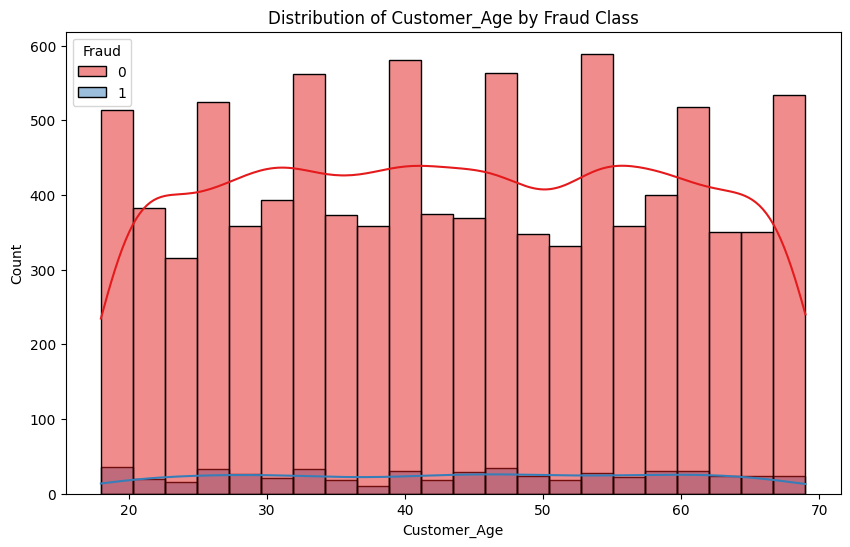

In [27]:
def plot_distributions():
    key_features = ['Transaction_Amount', 'Transaction_Time', 'Customer_Age']
    for feature in key_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=feature, hue='Fraud', kde=True, palette='Set1')
        plt.title(f'Distribution of {feature} by Fraud Class')
        plt.show()

plot_distributions()

## Function to take user input and predict fraud

In [28]:
def predict_fraud():
    # User input
    print("Enter the transaction details:")
    transaction_amount = float(input("Transaction Amount: "))
    transaction_time = float(input("Transaction Time: "))
    customer_age = int(input("Customer Age: "))
    customer_region = input("Customer Region (East/West/North/South): ")
    merchant_category = input("Merchant Category: ")
    card_type = input("Card Type (Debit/Credit/Prepaid): ")
    transaction_mode = input("Transaction Mode (Online/POS/ATM): ")
    previous_fraud_flag = int(input("Previous Fraud Flag (0/1): "))

    # Encoding the categorical inputs
    customer_region_enc = label_encoders['Customer_Region'].transform([customer_region])[0]
    merchant_category_enc = label_encoders['Merchant_Category'].transform([merchant_category])[0]
    card_type_enc = label_encoders['Card_Type'].transform([card_type])[0]
    transaction_mode_enc = label_encoders['Transaction_Mode'].transform([transaction_mode])[0]

    # Creating the feature array for prediction
    features = np.array([[
        transaction_amount, transaction_time, customer_age, customer_region_enc,
        merchant_category_enc, card_type_enc, transaction_mode_enc, previous_fraud_flag
    ]])

    # Standardizing the features
    features_scaled = scaler.transform(features)

    # Predicting fraud
    prediction = model.predict(features_scaled)[0]

    # Output the result
    if prediction == 1:
        print("The transaction is predicted to be FRAUDULENT.")
    else:
        print("The transaction is predicted to be NON-FRAUDULENT.")

In [29]:
predict_fraud()

Enter the transaction details:


Transaction Amount:  1500
Transaction Time:  1000
Customer Age:  22
Customer Region (East/West/North/South):  West
Merchant Category:  Travel
Card Type (Debit/Credit/Prepaid):  Prepaid
Transaction Mode (Online/POS/ATM):  ATM
Previous Fraud Flag (0/1):  0


The transaction is predicted to be NON-FRAUDULENT.
